# Développer des règles d'agrégation de données

## Eda (Analyse et exploration des données)

Tout d'abord, je transforme mes data excel en data csv

In [4]:
import pandas as pd
import os

def excel_to_csv(excel_file_path):
    # Charger le fichier Excel
    excel_data = pd.read_excel(excel_file_path, sheet_name=None)  # sheet_name=None pour lire toutes les feuilles
    
    # Répertoire de base du fichier et nom sans extension
    base_dir = os.path.dirname(excel_file_path)
    base_filename = os.path.splitext(os.path.basename(excel_file_path))[0]
    
    # Conversion de chaque feuille en fichier CSV
    csv_file_paths = []
    for sheet_name, data in excel_data.items():
        csv_file_path = os.path.join(base_dir, f"{base_filename}_{sheet_name}.csv")
        data.to_csv(csv_file_path, index=False)
        csv_file_paths.append(csv_file_path)
        print(f"Feuille '{sheet_name}' du fichier '{excel_file_path}' convertie en '{csv_file_path}'")
    
    return csv_file_paths

#  `openpyxl` est installé
try:
    import openpyxl
except ImportError:
    print("Exécutez la commande suivante : pip install openpyxl")
    raise

# Exemple d'utilisation
excel_files = ['/home/yves/iadev-python/c3/Week9MM.xlsx', '/home/yves/iadev-python/c3/Time Americans Spend Sleeping.xlsx']  # Liste des fichiers Excel à convertir

# Conversion des fichiers et récupération des chemins des fichiers CSV générés
csv_files = []
for file in excel_files:
    csv_files.extend(excel_to_csv(file))

print(csv_files)



Feuille 'Sheet1' du fichier '/home/yves/iadev-python/c3/Week9MM.xlsx' convertie en '/home/yves/iadev-python/c3/Week9MM_Sheet1.csv'
Feuille 'BLS Data Series' du fichier '/home/yves/iadev-python/c3/Time Americans Spend Sleeping.xlsx' convertie en '/home/yves/iadev-python/c3/Time Americans Spend Sleeping_BLS Data Series.csv'
['/home/yves/iadev-python/c3/Week9MM_Sheet1.csv', '/home/yves/iadev-python/c3/Time Americans Spend Sleeping_BLS Data Series.csv']


Mes csv sont en Anglais je vais traduire les csv pour choisir quelles colonnes je vais garder et lesqeuls je vais supprimmer

Traduction des csv 

In [17]:
import pandas as pd
from googletrans import Translator
import time
import os

# Liste des fichiers CSV à traiter
csv_files = [
    '/home/yves/iadev-python/c3/csv/Sleep_health_and_lifestyle_dataset.csv',
    '/home/yves/iadev-python/c3/csv/sleepdata_2.csv',
    '/home/yves/iadev-python/c3/csv/sleepdata.csv',
    '/home/yves/iadev-python/c3/csv/sleeping-alone-data.csv',
    '/home/yves/iadev-python/c3/csv/Time Americans Spend Sleeping_BLS Data Series.csv',
    '/home/yves/iadev-python/c3/csv/Week9MM_Sheet1.csv',
    '/home/yves/iadev-python/c3/csv/Fitbit Experiment.csv'
]

# Créez une instance du traducteur
translator = Translator()

def translate_text(text, src='en', dest='fr'):
    try:
        translation = translator.translate(text, src=src, dest=dest)
        return translation.text
    except Exception as e:
        print(f"Erreur de traduction pour le texte '{text}': {e}")
        return text  # Retourne le texte original en cas d'erreur

for file_path in csv_files:
    try:
        # Lire le fichier CSV
        df = pd.read_csv(file_path)

        # Assurez-vous qu'il y a au moins une ligne
        if not df.empty:
            # Traduisez les en-têtes
            first_line = df.columns.tolist()
            translated_line = [translate_text(text) for text in first_line]

            # Remplacez les en-têtes par les en-têtes traduits
            df.columns = translated_line

            # Sauvegardez les modifications dans le même fichier
            df.to_csv(file_path, index=False)
            print(f"Traduction de la première ligne dans {file_path} terminée.")

            # Attendez un peu pour éviter d'éventuels problèmes avec l'API
            time.sleep(1)
    except Exception as e:
        print(f"Erreur lors du traitement du fichier {file_path}: {e}")

print("Traduction terminée pour tous les fichiers.")


Traduction de la première ligne dans /home/yves/iadev-python/c3/csv/Sleep_health_and_lifestyle_dataset.csv terminée.
Traduction de la première ligne dans /home/yves/iadev-python/c3/csv/sleepdata_2.csv terminée.
Traduction de la première ligne dans /home/yves/iadev-python/c3/csv/sleepdata.csv terminée.
Erreur lors du traitement du fichier /home/yves/iadev-python/c3/csv/sleeping-alone-data.csv: 'utf-8' codec can't decode byte 0xeb in position 937: invalid continuation byte
Traduction de la première ligne dans /home/yves/iadev-python/c3/csv/Time Americans Spend Sleeping_BLS Data Series.csv terminée.
Traduction de la première ligne dans /home/yves/iadev-python/c3/csv/Week9MM_Sheet1.csv terminée.
Traduction terminée pour tous les fichiers.


In [19]:
import pandas as pd
from googletrans import Translator
import time

# Chemin du fichier CSV à traiter
file_path = '/home/yves/iadev-python/c3/csv/sleeping-alone-data.csv'

# Créez une instance du traducteur
translator = Translator()

def translate_text(text, src='en', dest='fr'):
    try:
        translation = translator.translate(text, src=src, dest=dest)
        return translation.text
    except Exception as e:
        print(f"Erreur de traduction pour le texte '{text}': {e}")
        return text  # Retourne le texte original en cas d'erreur

def detect_encoding(file_path):
    import chardet
    # Utiliser chardet pour détecter l'encodage
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

try:
    # Détecter l'encodage du fichier
    encoding = detect_encoding(file_path)
    print(f"Encodage détecté : {encoding}")

    print(f"Traitement du fichier : {file_path}")

    # Lire le fichier CSV avec l'encodage détecté
    df = pd.read_csv(file_path, encoding=encoding)
    
    # Afficher les premières lignes pour le diagnostic
    print(f"Premières lignes du fichier {file_path} :")
    print(df.head())
    
    # Assurez-vous qu'il y a au moins une ligne
    if not df.empty:
        # Traduisez les en-têtes
        first_line = df.columns.tolist()
        print(f"En-têtes avant traduction : {first_line}")
        
        translated_line = [translate_text(text) for text in first_line]
        print(f"En-têtes après traduction : {translated_line}")

        # Remplacez les en-têtes par les en-têtes traduits
        df.columns = translated_line

        # Sauvegardez les modifications dans le même fichier
        df.to_csv(file_path, index=False, encoding=encoding)
        print(f"Traduction de la première ligne dans {file_path} terminée.")

        # Attendez un peu pour éviter d'éventuels problèmes avec l'API
        time.sleep(1)
    else:
        print(f"Le fichier {file_path} est vide.")

except Exception as e:
    print(f"Erreur lors du traitement du fichier {file_path}: {e}")

print("Traduction terminée pour le fichier spécifié.")



Encodage détecté : ISO-8859-1
Traitement du fichier : /home/yves/iadev-python/c3/csv/sleeping-alone-data.csv
Premières lignes du fichier /home/yves/iadev-python/c3/csv/sleeping-alone-data.csv :
       StartDate        EndDate  \
0            NaN            NaN   
1  7/10/14 18:37  7/10/14 18:39   
2  7/10/14 15:54  7/10/14 15:56   
3  7/10/14 15:44  7/10/14 15:49   
4  7/10/14 13:47  7/10/14 13:47   

  Which of the following best describes your current relationship status?  \
0                                           Response                        
1    Single, but cohabiting with a significant other                        
2    Single, but cohabiting with a significant other                        
3                                            Married                        
4                                            Married                        

  How long have you been in your current relationship? If you are not currently in a relationship, please answer according to your l

Les données que je cherche sont : Durée du sommeil, qualité du sommeil, fréquence cardiaque, tension artérielle, niveau de stress.

In [22]:
import pandas as pd
import os

# Chemin du dossier contenant les fichiers CSV
input_folder = '/home/yves/iadev-python/c3/csv'

# Liste des variables importantes
variables = {
    'Durée du sommeil': ['Minutes endormis', 'Durée du sommeil', 'Temps endormi (secondes)', 'Temps au lit', 'AVG HRS par jour Sleeping'],
    'Qualité du sommeil': ['Qualité du sommeil'],
    'Fréquence cardiaque': ['Rythme cardiaque', 'rythme cardiaque (bpm)', 'rythme cardiaque', 'Activité'],
    'Tension artérielle': ['Pression artérielle', 'pression de l\'air (PA)'],
    'Niveau de stress': ['Niveau de stress', 'humeur']
}

def check_columns(df, column_list):
    """Check if any of the specified columns are in the dataframe."""
    existing_columns = df.columns
    matched_columns = [col for col in column_list if col in existing_columns]
    return matched_columns

def process_datasets(input_folder):
    """Process all CSV files in the given folder and check columns."""
    results = {}
    
    for file_name in os.listdir(input_folder):
        if file_name.endswith('.csv'):
            file_path = os.path.join(input_folder, file_name)
            
            # List of possible encodings to try
            encodings = ['utf-8', 'ISO-8859-1', 'windows-1252']
            
            df = None
            for encoding in encodings:
                try:
                    df = pd.read_csv(file_path, encoding=encoding)
                    break
                except UnicodeDecodeError:
                    print(f"Error reading {file_name} with encoding {encoding}. Trying next encoding...")
            
            if df is not None:
                results[file_name] = {}
                for key, columns in variables.items():
                    matched_columns = check_columns(df, columns)
                    results[file_name][key] = matched_columns
            else:
                results[file_name] = 'Failed to read file with provided encodings'
                
    return results

# Process the datasets
results = process_datasets(input_folder)

# Print the results
for file_name, cols in results.items():
    print(f"File: {file_name}")
    if isinstance(cols, str):
        print(f"  {cols}")
    else:
        for var, matched in cols.items():
            print(f"  {var}: {matched}")
    print("\n")


Error reading sleeping-alone-data.csv with encoding utf-8. Trying next encoding...
File: Time Americans Spend Sleeping_BLS Data Series.csv
  Durée du sommeil: ['AVG HRS par jour Sleeping']
  Qualité du sommeil: []
  Fréquence cardiaque: ['Activité']
  Tension artérielle: []
  Niveau de stress: []


File: sleepdata.csv
  Durée du sommeil: []
  Qualité du sommeil: []
  Fréquence cardiaque: []
  Tension artérielle: []
  Niveau de stress: []


File: Week9MM_Sheet1.csv
  Durée du sommeil: []
  Qualité du sommeil: []
  Fréquence cardiaque: []
  Tension artérielle: []
  Niveau de stress: []


File: sleeping-alone-data.csv
  Durée du sommeil: []
  Qualité du sommeil: []
  Fréquence cardiaque: []
  Tension artérielle: []
  Niveau de stress: []


File: Sleep_health_and_lifestyle_dataset.csv
  Durée du sommeil: ['Durée du sommeil']
  Qualité du sommeil: ['Qualité du sommeil']
  Fréquence cardiaque: ['Rythme cardiaque']
  Tension artérielle: ['Pression artérielle']
  Niveau de stress: ['Niveau de 

Voici les en-têtes de colonnes qui apparaissent dans plusieurs datasets :

        Qualité du sommeil :

        Dataset 2
        Dataset 3
        Dataset 4

        Durée du sommeil / Minutes endormis / Temps endormi :

        Dataset 1 (Minutes endormis)
        Dataset 2 (Durée du sommeil)
        Dataset 3 (Temps endormi (secondes))
        Dataset 4 (Temps au lit)

        Rythme cardiaque :

        Dataset 2 (Rythme cardiaque)
        Dataset 3 (Rythme cardiaque (bpm))
        Dataset 4 (Rythme cardiaque)

        Temps au lit / Temps au lit (secondes) :

        Dataset 1 (Temps au lit)
        Dataset 3 (Temps au lit (secondes))
        Dataset 4 (Temps au lit)
        
        Étapes / Marches :

        Dataset 1 (Pas)
        Dataset 3 (Marches)
        Dataset 4 (Activité (étapes))

Je vois que les datset 3 et 4 ont des simmilitudes je vais les utiliser

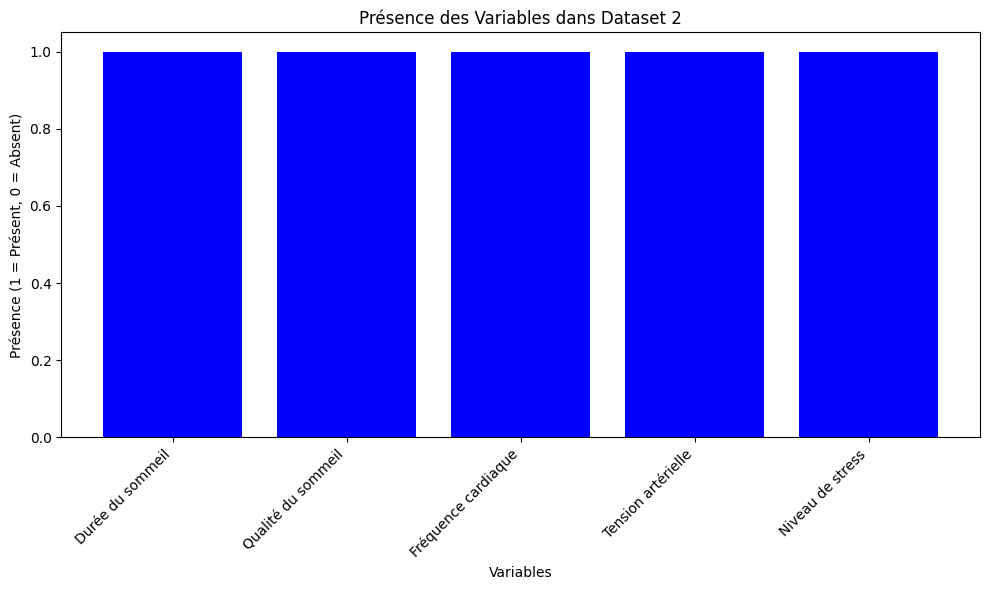

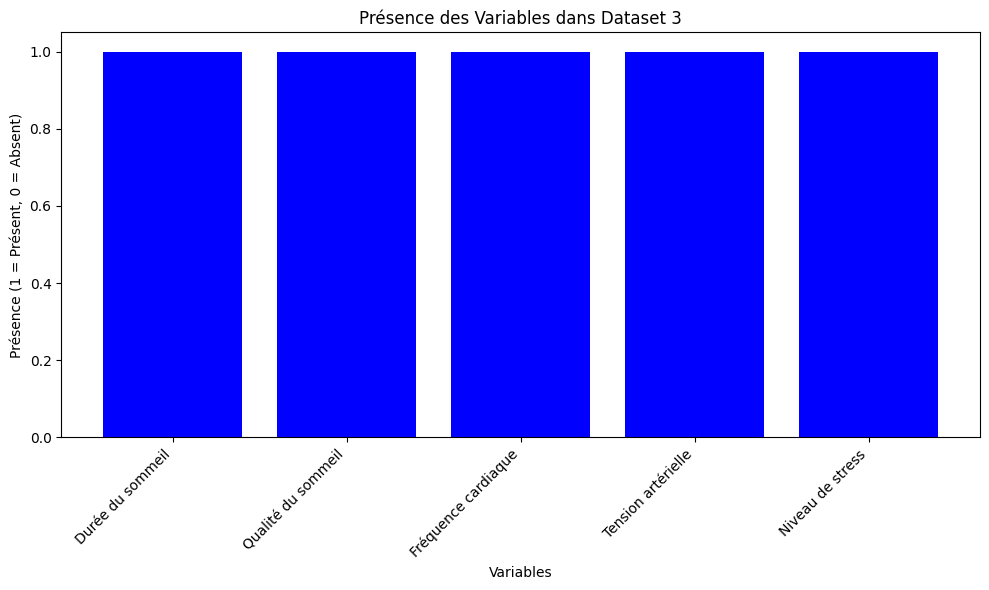

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Chemins des fichiers des datasets
files = {
    'Dataset 2': '/home/yves/iadev-python/c3/csv/Sleep_health_and_lifestyle_dataset.csv',
    'Dataset 3': '/home/yves/iadev-python/c3/csv/sleepdata_2.csv'
}

# Définir les variables à vérifier
variables = {
    'Durée du sommeil': ['Durée du sommeil', 'Temps au lit (secondes)', 'Temps endormi (secondes)'],
    'Qualité du sommeil': ['Qualité du sommeil', 'qualité du sommeil'],
    'Fréquence cardiaque': ['Rythme cardiaque', 'rythme cardiaque (bpm)'],
    'Tension artérielle': ['Pression artérielle', 'pression de l\'air (PA)'],
    'Niveau de stress': ['Niveau de stress', 'humeur']
}

def get_column_names(file_path):
    """Lire les noms des colonnes d'un fichier CSV et retourner un ensemble de colonnes."""
    try:
        df = pd.read_csv(file_path, encoding='ISO-8859-1', delimiter=';')  # Essayer avec un délimiteur et un encodage possible
        return set(df.columns.str.strip())  # Nettoyer les espaces superflus
    except Exception as e:
        print(f"Erreur lors de la lecture de {file_path}: {e}")
        return set()

def check_variable_presence(column_names, variable_list):
    """Vérifier la présence des colonnes d'une variable dans l'ensemble des colonnes."""
    return {var: (var in column_names) for var in variable_list}

def create_bar_chart(data, dataset_name):
    """Créer un graphique en barres pour visualiser la présence des variables dans un dataset."""
    fig, ax = plt.subplots(figsize=(10, 6))
    
    variable_names = list(data.keys())
    presence = [1 if data[var] else 0 for var in variable_names]
    
    # Créer les barres
    ax.bar(variable_names, presence, color='blue')
    
    # Configurer les labels et la légende
    ax.set_xlabel('Variables')
    ax.set_ylabel('Présence (1 = Présent, 0 = Absent)')
    ax.set_title(f'Présence des Variables dans {dataset_name}')
    ax.set_xticks(range(len(variable_names)))
    ax.set_xticklabels(variable_names, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

def main():
    """Vérifier la présence des variables dans les datasets et créer des graphiques séparés."""
    for dataset_name, file_path in files.items():
        column_names = get_column_names(file_path)
        presence_data = {
            variable: check_variable_presence(column_names, variable_list)
            for variable, variable_list in variables.items()
        }
        create_bar_chart(presence_data, dataset_name)

# Exécuter le script
if __name__ == "__main__":
    main()


Je vais faire un test de quatres dataset different pour voir la qualité des données :
Mélanger le dataset 3 et 4 

Mélanger le dataset 2, 3 et 4

Melanger les datset avec la big data

Creer un dattset et dupliquer les données pour que ca devienne un enorme datset 

Cette agrargtion des donens me permettra de voir par la suite quelle ets me datset le plus interressant a entrainer.

Dupliquer les dataset

In [4]:
import pandas as pd
import os

# Chemin du fichier CSV original
file_path_df1 = '/home/yves/iadev-python/c3/csv/sleepdata.csv'

# Définir le nom du nouveau fichier CSV
new_file_name = 'duplicated_sleepdata.csv'
output_dir = os.path.dirname(file_path_df1)  # Répertoire du fichier original
new_file_path = os.path.join(output_dir, new_file_name)

# Chargement du fichier CSV original
try:
    df1 = pd.read_csv(file_path_df1, delimiter=',')  # Ajustez le délimiteur si nécessaire
    print("Fichier CSV chargé avec succès.")
except Exception as e:
    print(f"Erreur lors de la lecture du fichier CSV : {e}")
    exit()

# Sauvegarder le DataFrame dans un nouveau fichier CSV
try:
    df1.to_csv(new_file_path, index=False)  # Sauvegarde sans les index
    print(f"Le fichier a été dupliqué avec succès sous : {new_file_path}")
except Exception as e:
    print(f"Erreur lors de la sauvegarde du fichier : {e}")


Fichier CSV chargé avec succès.
Le fichier a été dupliqué avec succès sous : /home/yves/iadev-python/c3/csv/duplicated_sleepdata.csv


Garder les valeurs interressantes des dataset

In [1]:
import pandas as pd
import os

# Chemin du fichier CSV original
file_path = '/home/yves/iadev-python/c3/csv/duplicated_sleepdata2.csv'

# Définir le nom du nouveau fichier CSV
new_file_name = 'filtered_sleepdata.csv'
output_dir = os.path.dirname(file_path)  # Répertoire du fichier original
new_file_path = os.path.join(output_dir, new_file_name)

# Colonnes spécifiques à conserver
columns_to_keep = [
    'qualité du sommeil',
    'temps au lit',
    'activité (étapes)',
    'rythme cardiaque'
]

# Chargement du fichier CSV avec le délimiteur approprié (point-virgule)
try:
    df = pd.read_csv(file_path, delimiter=';')
    print("Fichier CSV chargé avec succès.")
except Exception as e:
    print(f"Erreur lors de la lecture du fichier CSV : {e}")
    exit()

# Nettoyer les noms des colonnes (enlever les espaces superflus)
df.columns = df.columns.str.strip()

# Afficher les colonnes disponibles dans le DataFrame après nettoyage
print("Colonnes disponibles dans le fichier :", df.columns.tolist())

# Sélectionner les colonnes à conserver
selected_columns = [col for col in columns_to_keep if col in df.columns]
print("Colonnes sélectionnées :", selected_columns)

# Vérifiez si des colonnes sont sélectionnées
if not selected_columns:
    print("Aucune des colonnes spécifiées n'est présente dans le fichier.")
    exit()

# Créer un DataFrame avec les colonnes sélectionnées
df_filtered = df[selected_columns]

# Afficher les premières lignes du DataFrame filtré
print("Aperçu des données filtrées :")
print(df_filtered.head())

# Sauvegarder le DataFrame filtré dans un nouveau fichier CSV
try:
    df_filtered.to_csv(new_file_path, index=False, sep=';')  # Sauvegarder avec délimiteur point-virgule
    print(f"Le fichier filtré est sauvegardé sous : {new_file_path}")
except Exception as e:
    print(f"Erreur lors de la sauvegarde du fichier : {e}")



Fichier CSV chargé avec succès.
Colonnes disponibles dans le fichier : ['Commencer', 'fin', 'qualité du sommeil', 'temps au lit', 'réveil', 'notes de sommeil', 'rythme cardiaque', 'activité (étapes)']
Colonnes sélectionnées : ['qualité du sommeil', 'temps au lit', 'activité (étapes)', 'rythme cardiaque']
Aperçu des données filtrées :
  qualité du sommeil temps au lit  activité (étapes)  rythme cardiaque
0               100%        8: 32                  0              59.0
1                 3%         0:16                  0              72.0
2                98%         8:30                  0              57.0
3                65%         7:32                  0               NaN
4                72%         6:44                  0              68.0
Le fichier filtré est sauvegardé sous : /home/yves/iadev-python/c3/csv/filtered_sleepdata.csv


In [3]:
import pandas as pd
import os

# Chemin du fichier CSV original
original_file_path = '/home/yves/iadev-python/c3/csv/sleepdata.csv'

# Définir le nom du fichier dupliqué et du fichier filtré
duplicated_file_name = 'duplicated_sleepdata_2.csv'
filtered_file_name = 'filtered_sleepdata_2.csv'

# Répertoires des fichiers
original_dir = os.path.dirname(original_file_path)
duplicated_file_path = os.path.join(original_dir, duplicated_file_name)
filtered_file_path = os.path.join(original_dir, filtered_file_name)

# Colonnes spécifiques à conserver
columns_to_keep = {
    'qualité du sommeil': 'qualité du sommeil',
    'temps au lit (secondes)': 'temps au lit (secondes)',
    'marches': 'marches',
    'rythme cardiaque (bpm)': 'rythme cardiaque (bpm)',
    'temps endormi (secondes)': 'temps endormi (secondes)'
}

# Étape 1 : Dupliquer le fichier CSV
try:
    # Lire le fichier original
    df = pd.read_csv(original_file_path, delimiter=';')  # Utilisez ';' comme délimiteur
    # Sauvegarder le fichier dupliqué
    df.to_csv(duplicated_file_path, index=False)
    print(f"Fichier dupliqué avec succès sous : {duplicated_file_path}")
except Exception as e:
    print(f"Erreur lors de la duplication du fichier CSV : {e}")
    exit()

# Étape 2 : Conserver uniquement les colonnes d'intérêt
try:
    # Recharger le fichier dupliqué
    df = pd.read_csv(duplicated_file_path, delimiter=';')
    
    # Nettoyer les noms des colonnes (enlever les espaces superflus)
    df.columns = df.columns.str.strip()
    
    # Afficher les colonnes disponibles dans le DataFrame après nettoyage
    print("Colonnes disponibles dans le fichier :", df.columns.tolist())
    
    # Sélectionner les colonnes à conserver
    selected_columns = [col for col in columns_to_keep.keys() if col in df.columns]
    print("Colonnes sélectionnées :", selected_columns)
    
    # Créer un DataFrame avec les colonnes sélectionnées
    df_filtered = df[selected_columns] if selected_columns else pd.DataFrame()
    
    # Afficher les premières lignes du DataFrame filtré
    print("Aperçu des données filtrées :")
    print(df_filtered.head())
    
    # Sauvegarder le DataFrame filtré dans un nouveau fichier CSV
    df_filtered.to_csv(filtered_file_path, index=False)
    print(f"Le fichier filtré est sauvegardé sous : {filtered_file_path}")
except Exception as e:
    print(f"Erreur lors du traitement du fichier CSV : {e}")


Fichier dupliqué avec succès sous : /home/yves/iadev-python/c3/csv/duplicated_sleepdata_2.csv
Colonnes disponibles dans le fichier : ['Commencer, fin, qualité du sommeil, temps au lit, réveil, notes de sommeil, rythme cardiaque, activité (étapes)']
Colonnes sélectionnées : []
Aperçu des données filtrées :
Empty DataFrame
Columns: []
Index: []
Le fichier filtré est sauvegardé sous : /home/yves/iadev-python/c3/csv/filtered_sleepdata_2.csv


Dupliquer nouveau dataset 

In [2]:
import pandas as pd
import os
import shutil

# Chemin du fichier CSV original
original_file_path = '/home/yves/iadev-python/c3/csv/sleepdata_2.csv'

# Définir le nom du nouveau fichier CSV dupliqué
duplicated_file_name = 'duplicated_sleepdata_2.csv'
output_dir = os.path.dirname(original_file_path)  # Répertoire du fichier original
duplicated_file_path = os.path.join(output_dir, duplicated_file_name)

# Copier le fichier CSV original vers le nouveau fichier CSV
try:
    shutil.copy(original_file_path, duplicated_file_path)
    print(f"Fichier dupliqué avec succès sous : {duplicated_file_path}")
except Exception as e:
    print(f"Erreur lors de la duplication du fichier : {e}")
    exit()


Fichier dupliqué avec succès sous : /home/yves/iadev-python/c3/csv/duplicated_sleepdata_2.csv


Filtrer nouveau dataset

In [3]:
import pandas as pd
import os

# Chemin du fichier CSV dupliqué
file_path = '/home/yves/iadev-python/c3/csv/duplicated_sleepdata_2.csv'

# Définir le nom du nouveau fichier CSV filtré
new_file_name = 'filtered_sleepdata2.csv'
output_dir = os.path.dirname(file_path)  # Répertoire du fichier dupliqué
new_file_path = os.path.join(output_dir, new_file_name)

# Colonnes spécifiques à conserver
columns_to_keep = [
    'qualité du sommeil',
    'temps au lit (secondes)',
    'marches',
    'rythme cardiaque (bpm)'
]

# Chargement du fichier CSV avec le délimiteur approprié (point-virgule)
try:
    df = pd.read_csv(file_path, delimiter=';')
    print("Fichier CSV chargé avec succès.")
except Exception as e:
    print(f"Erreur lors de la lecture du fichier CSV : {e}")
    exit()

# Nettoyer les noms des colonnes (enlever les espaces superflus)
df.columns = df.columns.str.strip()

# Afficher les colonnes disponibles dans le DataFrame après nettoyage
print("Colonnes disponibles dans le fichier :", df.columns.tolist())

# Sélectionner les colonnes à conserver
selected_columns = [col for col in columns_to_keep if col in df.columns]
print("Colonnes sélectionnées :", selected_columns)

# Vérifiez si des colonnes sont sélectionnées
if not selected_columns:
    print("Aucune des colonnes spécifiées n'est présente dans le fichier.")
    exit()

# Créer un DataFrame avec les colonnes sélectionnées
df_filtered = df[selected_columns]

# Afficher les premières lignes du DataFrame filtré
print("Aperçu des données filtrées :")
print(df_filtered.head())

# Sauvegarder le DataFrame filtré dans un nouveau fichier CSV
try:
    df_filtered.to_csv(new_file_path, index=False, sep=';')  # Sauvegarder avec délimiteur point-virgule
    print(f"Le fichier filtré est sauvegardé sous : {new_file_path}")
except Exception as e:
    print(f"Erreur lors de la sauvegarde du fichier : {e}")


Fichier CSV chargé avec succès.
Colonnes disponibles dans le fichier : ['Démarrer', 'fin', 'qualité du sommeil', 'régularité', 'humeur', 'rythme cardiaque (bpm)', 'marches', 'mode alarme', "pression de l'air (PA)", 'ville', 'mouvements par heure', 'temps au lit (secondes)', 'temps endormi (secondes)', 'temps avant le sommeil(secondes)', 'démarrage de la fenêtre', 'arrêt de la fenêtre', 'a été ronflé', 'temps de ronflement', 'température météorologique (° C)', 'type météo', 'notes']
Colonnes sélectionnées : ['qualité du sommeil', 'temps au lit (secondes)', 'marches', 'rythme cardiaque (bpm)']
Aperçu des données filtrées :
  qualité du sommeil  temps au lit (secondes)  marches  rythme cardiaque (bpm)
0                NaN                      NaN      NaN                     NaN
1                73%                  28810.2   4746.0                     0.0
2                86%                  30461.5   4007.0                     0.0
3                77%                  25327.6   6578.0 

In [4]:
import pandas as pd

# Charger le dataset 3
dataset3 = pd.read_csv('/home/yves/iadev-python/c3/csv/sleepdata_2.csv', delimiter=';')

# Afficher les noms des colonnes
print(dataset3.columns)


Index(['Démarrer', ' fin', ' qualité du sommeil', ' régularité', ' humeur',
       ' rythme cardiaque (bpm)', ' marches', ' mode alarme',
       ' pression de l'air (PA)', ' ville', ' mouvements par heure',
       ' temps au lit (secondes)', ' temps endormi (secondes)',
       ' temps avant le sommeil(secondes)', ' démarrage de la fenêtre',
       ' arrêt de la fenêtre', ' a été ronflé', ' temps de ronflement',
       ' température météorologique (° C)', ' type météo', ' notes'],
      dtype='object')


Je recupere les données qui m'interresse

In [5]:
import pandas as pd

# Charger les datasets
dataset2 = pd.read_csv('/home/yves/iadev-python/c3/csv/Sleep_health_and_lifestyle_dataset.csv', delimiter=',')
dataset3 = pd.read_csv('/home/yves/iadev-python/c3/csv/sleepdata_2.csv', delimiter=';')

# Vérifier les noms de colonnes dans dataset3
print("Colonnes dans dataset3:", dataset3.columns)

# Renommer les colonnes du dataset 3 pour correspondre à celles du dataset 2
dataset3.rename(columns={
    ' qualité du sommeil': 'Qualité du sommeil',
    ' rythme cardiaque (bpm)': 'Rythme cardiaque',
    ' marches': 'Étapes quotidiennes',
    ' temps endormi (secondes)': 'Durée du sommeil',
    ' temps au lit (secondes)': 'Temps au lit'
}, inplace=True)

# Conversion du temps endormi de secondes à heures pour correspondre au dataset 2
dataset3['Durée du sommeil'] = dataset3['Durée du sommeil'] / 3600

# Sélectionner les colonnes d'intérêt
cols_to_select = ['Qualité du sommeil', 'Rythme cardiaque', 'Étapes quotidiennes', 'Durée du sommeil']

# Extraire les colonnes d'intérêt des datasets
data2 = dataset2[cols_to_select]
data3 = dataset3[cols_to_select]

# Ajouter une colonne d'identifiant pour indiquer la source
data2['Source'] = 'Dataset2'
data3['Source'] = 'Dataset3'

# Combiner les datasets
combined_data = pd.concat([data2, data3], ignore_index=True)

# Sauvegarder le dataset combiné
combined_data.to_csv('/home/yves/iadev-python/c3/csv/Combined_Dataset.csv', index=False)

print("Agrégation des données terminée. Le fichier combiné est sauvegardé sous Combined_Dataset.csv")



Colonnes dans dataset3: Index(['Démarrer', ' fin', ' qualité du sommeil', ' régularité', ' humeur',
       ' rythme cardiaque (bpm)', ' marches', ' mode alarme',
       ' pression de l'air (PA)', ' ville', ' mouvements par heure',
       ' temps au lit (secondes)', ' temps endormi (secondes)',
       ' temps avant le sommeil(secondes)', ' démarrage de la fenêtre',
       ' arrêt de la fenêtre', ' a été ronflé', ' temps de ronflement',
       ' température météorologique (° C)', ' type météo', ' notes'],
      dtype='object')
Agrégation des données terminée. Le fichier combiné est sauvegardé sous Combined_Dataset.csv


/tmp/ipykernel_1422/281989963.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Source'] = 'Dataset2'
/tmp/ipykernel_1422/281989963.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['Source'] = 'Dataset3'


Qualité du sommeil : Numérique (échelle de 1 à 10)

Rythme cardiaque : Numérique (battements par minute, bpm)

Étapes quotidiennes : Numérique (nombre de pas)

Durée du sommeil : Numérique (heures)

Je supprimme la collone source 

In [6]:
import pandas as pd

# Chemin vers le fichier CSV existant
input_file_path = "/home/yves/iadev-python/c3/csv/Combined_Dataset.csv"
# Chemin vers le nouveau fichier CSV sans la colonne "Source"
output_file_path = "/home/yves/iadev-python/c3/csv/Combined_Dataset_sans_lasource.csv"

# Lire le fichier CSV existant
df = pd.read_csv(input_file_path)

# Supprimer la colonne "Source"
df = df.drop(columns=["Source"])

# Sauvegarder le DataFrame dans un nouveau fichier CSV sans la colonne "Source"
df.to_csv(output_file_path, index=False)

print(f"Le nouveau fichier sans la colonne 'Source' a été sauvegardé sous : {output_file_path}")


Le nouveau fichier sans la colonne 'Source' a été sauvegardé sous : /home/yves/iadev-python/c3/csv/Combined_Dataset_sans_lasource.csv


Ensuite je recupere lkes données personelle nottament l'age et le sexe de la personne (utiliser à la suite dans le bloc c4)

In [6]:
import pandas as pd

# Chemins des fichiers
path_existing_dataset = '/home/yves/iadev-python/c3/csv/Combined_Dataset_sans_lasource.csv'
path_additional_dataset = '/home/yves/iadev-python/c3/csv/Sleep_health_and_lifestyle_dataset.csv'
path_output_dataset = '/home/yves/iadev-python/c3/csv/Combined_Dataset_avec_genre_age.csv'

# Chargement des datasets
existing_df = pd.read_csv(path_existing_dataset)
additional_df = pd.read_csv(path_additional_dataset)

# Assurez-vous d'utiliser les noms de colonnes exacts ici
gender_column = 'Genre'  # Remplacez par le nom correct si différent
age_column = 'Âge'        # Remplacez par le nom correct si différent

# Extraction des colonnes 'gender' et 'age'
additional_columns = additional_df[[gender_column, age_column]]

# Vérification des dimensions
existing_len = existing_df.shape[0]
additional_len = additional_columns.shape[0]

# Dupliquer les lignes du dataset plus petit
if additional_len < existing_len:
    # Calculer le nombre de répétitions nécessaires
    num_repeats = (existing_len // additional_len) + 1
    additional_columns = pd.concat([additional_columns] * num_repeats, ignore_index=True)

# Troncature du dataframe additionnel pour qu'il ait exactement le même nombre de lignes
additional_columns = additional_columns.iloc[:existing_len]

# Fusion des colonnes 'gender' et 'age' avec le dataset existant
combined_df = pd.concat([additional_columns, existing_df], axis=1)

# Enregistrement du nouveau dataset
combined_df.to_csv(path_output_dataset, index=False)

print(f"Nouveau dataset enregistré à {path_output_dataset}")



Nouveau dataset enregistré à /home/yves/iadev-python/c3/csv/Combined_Dataset_avec_genre_age.csv


Je supprime les données manquantes

In [10]:
import pandas as pd

# Chemin du fichier
path_dataset = '/home/yves/iadev-python/c3/csv/Combined_Dataset_avec_genre_age.csv'
path_output_dataset = '/home/yves/iadev-python/c3/csv/Combine_Dataset_nettoyé.csv'

# Charger le dataset
df = pd.read_csv(path_dataset)

# Identifier les lignes avec des valeurs manquantes
missing_values = df[df.isnull().any(axis=1)]

# Supprimer les lignes avec des valeurs manquantes
df_cleaned = df.dropna()

# Afficher les lignes supprimées
print("Lignes supprimées :")
print(missing_values)

# Enregistrer le dataset nettoyé
df_cleaned.to_csv(path_output_dataset, index=False)

print(f"Nouveau dataset enregistré à {path_output_dataset}")


Lignes supprimées :
    Genre  Âge Qualité du sommeil  Rythme cardiaque  Étapes quotidiennes  \
374  Male   27                NaN               NaN                  NaN   

     Durée du sommeil  
374               NaN  
Nouveau dataset enregistré à /home/yves/iadev-python/c3/csv/Combine_Dataset_nettoyé.csv


Re agrégation de la partie "qualité du sommeil" entre le datqadset 

In [14]:
import pandas as pd

# Chemin du fichier
path_dataset = '/home/yves/iadev-python/c3/csv/Combine_Dataset_nettoyé.csv'

# Charger le dataset
df = pd.read_csv(path_dataset)

# Fonction pour convertir les notes sur 10 en pourcentages
def convert_to_percentage(val):
    try:
        val = float(val)
        if val <= 10:
            return f"{val * 10}%"
    except ValueError:
        pass
    return val

# Appliquer la conversion uniquement aux lignes de 1 à 375
df.loc[:374, 'Qualité du sommeil'] = df.loc[:374, 'Qualité du sommeil'].apply(convert_to_percentage)

# Afficher les lignes modifiées
print("Lignes avec des notes converties en pourcentages :")
print(df.loc[:374])

# Sauvegarder les modifications dans le même fichier
df.to_csv(path_dataset, index=False)

print(f"Dataset mis à jour et enregistré à {path_dataset}")




Lignes avec des notes converties en pourcentages :
      Genre  Âge Qualité du sommeil  Rythme cardiaque  Étapes quotidiennes  \
0      Male   27              60.0%              77.0               4200.0   
1      Male   28              60.0%              75.0              10000.0   
2      Male   28              60.0%              75.0              10000.0   
3      Male   28              40.0%              85.0               3000.0   
4      Male   28              40.0%              85.0               3000.0   
..      ...  ...                ...               ...                  ...   
370  Female   59              90.0%              68.0               7000.0   
371  Female   59              90.0%              68.0               7000.0   
372  Female   59              90.0%              68.0               7000.0   
373  Female   59              90.0%              68.0               7000.0   
374    Male   28                73%               0.0               4746.0   

     Durée d

Donner un score a mon dataset pour voir linfluence de sommeil dans la vie de l'individu

In [17]:
import pandas as pd

# Charger le dataset
file_path = '/home/yves/iadev-python/c3/csv/Combine_Dataset_nettoyé.csv'
df = pd.read_csv(file_path)

def calculate_health_score(row):
    score = 0
    
    # Critères pour la qualité du sommeil
    try:
        if isinstance(row['Qualité du sommeil'], str) and '%' in row['Qualité du sommeil']:
            quality_of_sleep = int(row['Qualité du sommeil'].replace('%', ''))
        else:
            quality_of_sleep = float(row['Qualité du sommeil']) * 10
        
        if quality_of_sleep >= 65:
            score += 0.25
    except ValueError:
        pass  # Ignore rows where 'Qualité du sommeil' cannot be converted
    
    # Critères pour le rythme cardiaque
    if 60 <= row['Rythme cardiaque'] <= 100:
        score += 0.25
    
    # Critères pour les étapes quotidiennes
    if 7500 <= row['Étapes quotidiennes'] <= 12499:
        score += 0.25
    
    # Critères pour la durée du sommeil
    if 7 <= row['Durée du sommeil'] <= 9:
        score += 0.25
    
    return score

# Appliquer la fonction pour calculer le score
df['Score de santé'] = df.apply(calculate_health_score, axis=1)

# Sauvegarder le nouveau dataset avec le score ajouté
output_file_path = '/home/yves/iadev-python/c3/csv/Combine_Dataset_avec_score.csv'
df.to_csv(output_file_path, index=False)


Qualité du sommeil : Si la qualité du sommeil est de 65% ou plus, le score est augmenté de 0.25.

Rythme cardiaque : Si le rythme cardiaque est entre 60 et 100 bpm, le score est augmenté de 0.25.

Étapes quotidiennes : Si le nombre de pas quotidiens est entre 7500 et 12499, le score est augmenté de 0.25.

Durée du sommeil : Si la durée du sommeil est entre 7 et 9 heures, le score est augmenté de 0.25.


Le score sera une note sur un point /1